## Operators

### Base operators

In [921]:
import networkx as nx

def op_end(digraph, target_node):
    return tuple()


def op_wait(digraph, target_node):
    return (target_node, target_node)

def ins_rec(digraph, target_node):
    return (target_node, target_node)

### One-to-one operators

In [922]:
import copy

def op_o_tto(digraph, target_node):    
    """
    new output node
    - target node
    - - take
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_outputs = list(digraph.successors(target_node))

    for output_node in target_outputs:
        digraph.remove_edge(target_node, output_node)
        digraph.add_edge(new_node, output_node)
        
    digraph.add_edge(target_node, new_node)

    return (target_node, new_node)


def op_i_tti(digraph, target_node):
    """
    new input node
    - target node
    - - take
    - - - inputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))

    for input_node in target_inputs:
        digraph.remove_edge(input_node, target_node)
        digraph.add_edge(input_node, new_node)
        
    digraph.add_edge(new_node, target_node)

    return (target_node, new_node)


def op_o_tto_ici(digraph, target_node):    
    """
    new output node
    - target node
    - - take
    - - - outputs
    - target node inputs
    - - copy
    - - - inputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

    for output_node in target_outputs:
        digraph.remove_edge(target_node, output_node)
        digraph.add_edge(new_node, output_node)
        
    target_inputs_inputs = []

    for input_node in target_inputs:
        target_inputs_inputs.extend(list(digraph.predecessors(input_node)))
        
    for input_node in target_inputs_inputs:
        digraph.add_edge(input_node, new_node)
        
    digraph.add_edge(target_node, new_node)

    return (target_node, new_node)


def op_o_tto_ico(digraph, target_node):    
    """
    new output node
    - target node
    - - take
    - - - outputs
    - target node inputs
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

    for output_node in target_outputs:
        digraph.remove_edge(target_node, output_node)
        digraph.add_edge(new_node, output_node)
        
    target_inputs_outputs = []

    for input_node in target_inputs:
        target_inputs_outputs.extend(list(digraph.successors(input_node)))
        
    for input_node in target_inputs_outputs:
        digraph.add_edge(input_node, new_node)
        
    digraph.add_edge(target_node, new_node)

    return (target_node, new_node)


def op_i_tti_oco(digraph, target_node):
    """
    new input node
    - target node
    - - take
    - - - inputs
    - target node outputs
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))
    
    for input_node in target_inputs:
        digraph.remove_edge(input_node, target_node)
        digraph.add_edge(input_node, new_node)

    target_outputs_outputs = []

    for output_node in target_outputs:
        target_outputs_outputs.extend(list(digraph.successors(output_node)))

    for output_node in target_outputs_outputs:
        digraph.add_edge(new_node, output_node)
    
    digraph.add_edge(new_node, target_node)

    return (target_node, new_node)


def op_i_tti_oci(digraph, target_node):
    """
    new input node
    - target node
    - - take
    - - - inputs
    - target node outputs
    - - copy
    - - - inputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))
    
    for input_node in target_inputs:
        digraph.remove_edge(input_node, target_node)
        digraph.add_edge(input_node, new_node)

    target_outputs_inputs = []

    for output_node in target_outputs:
        target_outputs_inputs.extend(list(digraph.predecessors(output_node)))

    for output_node in target_outputs_inputs:
        digraph.add_edge(new_node, output_node)
    
    digraph.add_edge(new_node, target_node)

    return (target_node, new_node)


def op_o_tto_tci(digraph, target_node):    
    """
    new output node
    - target node
    - - take
    - - - outputs
    - target node
    - - copy
    - - - inputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

    for output_node in target_outputs:
        digraph.remove_edge(target_node, output_node)
        digraph.add_edge(new_node, output_node)

    for input_node in target_inputs:
        digraph.add_edge(input_node, new_node)
        
    digraph.add_edge(target_node, new_node)

    return (target_node, new_node)


def op_i_tti_tco(digraph, target_node):
    """
    new input node
    - target node
    - - take
    - - - inputs
    - target node
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))
    
    for input_node in target_inputs:
        digraph.remove_edge(input_node, target_node)
        digraph.add_edge(input_node, new_node)

    for output_node in target_outputs:
        digraph.add_edge(new_node, output_node)
        
    digraph.add_edge(new_node, target_node)

    return (target_node, new_node)


def op_p_tci_tco(digraph, target_node):
    """
    new parallel node
    - target node
    - - copy
    - - - inputs
    - target node
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

    if len(target_inputs) > 0 and len(target_outputs) > 0:
        for input_node in target_inputs:
            digraph.add_edge(input_node, new_node)
        for output_node in target_outputs:
            digraph.add_edge(new_node, output_node)
        return (target_node, new_node)
    else:
        return (target_node, target_node)


def op_p_ici_tco(digraph, target_node):
    """
    new parallel node
    - target node
    - - copy
    - - - inputs
    - target node
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

    target_inputs_inputs = []
    for input_node in target_inputs:
        target_inputs_inputs.extend(list(digraph.predecessors(input_node)))
    
    if len(target_inputs_inputs) > 0 and len(target_outputs) > 0:
        for input_node in target_inputs_inputs:
            digraph.add_edge(input_node, new_node)
        for output_node in target_outputs:
            digraph.add_edge(new_node, output_node)
        return (target_node, new_node)
    else:
        return (target_node, target_node)

def op_p_tci_oco(digraph, target_node):
    """
    new parallel node
    - target node
    - - copy
    - - - inputs
    - target node
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

    target_outputs_outputs = []
    for output_node in target_outputs:
        target_outputs_outputs.extend(list(digraph.successors(output_node)))
    
    if len(target_inputs) > 0 and len(target_outputs_outputs) > 0:
        for input_node in target_inputs:
            digraph.add_edge(input_node, new_node)
        for output_node in target_outputs_outputs:
            digraph.add_edge(new_node, output_node)
        return (target_node, new_node)
    else:
        return (target_node, target_node)
        

def op_o_tci_tco(digraph, target_node):
    """
    new output node
    - target node
    - - copy
    - - - inputs
    - target node
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

 
    for input_node in target_inputs:
        digraph.add_edge(input_node, new_node)
    for output_node in target_outputs:
        digraph.add_edge(new_node, output_node)

    digraph.add_edge(target_node, new_node)
        
    return (target_node, new_node)

def op_i_tci_tco(digraph, target_node):
    """
    new input node
    - target node
    - - copy
    - - - inputs
    - target node
    - - copy
    - - - outputs
    """
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))

 
    for input_node in target_inputs:
        digraph.add_edge(input_node, new_node)
    for output_node in target_outputs:
        digraph.add_edge(new_node, output_node)

    digraph.add_edge(new_node, target_node)
        
    return (target_node, new_node)


def op_i_a(digraph, target_node):
    """
    new input node
    - all nodes
    """
    new_node = digraph.number_of_nodes() + 1
    all_nodes = list(digraph.nodes())

    for node in all_nodes:
        digraph.add_edge(new_node, node)
        
    return (target_node, new_node)


def op_o_a(digraph, target_node):
    """
    new output node
    - all nodes
    """
    new_node = digraph.number_of_nodes() + 1
    all_nodes = list(digraph.nodes())

    for node in all_nodes:
        digraph.add_edge(node, new_node)
        
    return (target_node, new_node)


def op_i_ai(digraph, target_node):
    """
    new input node
    - all 0 in-degree nodes
    """
    new_node = digraph.number_of_nodes() + 1
    zero_indegree_nodes = [pair[0] for pair in list(digraph.in_degree) if pair[1] == 0]

    for node in zero_indegree_nodes:
        digraph.add_edge(new_node, node)
        
    return (target_node, new_node)


def op_o_ao(digraph, target_node):
    """
    new output node
    - all 0 out-degree nodes
    """
    new_node = digraph.number_of_nodes() + 1
    zero_outdegree_nodes = [pair[0] for pair in list(digraph.out_degree) if pair[1] == 0]

    for node in zero_outdegree_nodes:
        digraph.add_edge(node, new_node)
        
    return (target_node, new_node)

# ---
def op_cut_rest(digraph, target_node):
    zero_indegree_nodes = [pair[0] for pair in list(digraph.in_degree) if pair[1] == 0]
    zero_outdegree_nodes = [pair[0] for pair in list(digraph.out_degree) if pair[1] == 0]
    
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))
    
    if len(target_inputs) > 0 and len(target_outputs) > 0:
        for node in target_inputs:
            digraph.remove_edge(node, target_node)
            
        for node in target_outputs:
            digraph.add_edge(target_node, node)
            
        for node in zero_indegree_nodes:
            digraph.add_edge(node, target_node)

        for node in zero_outdegree_nodes:
            digraph.add_edge(target_node, node)

        for input_node in target_inputs:
            for output_node in target_outputs:
                digraph.add_edge(input_node, output_node)
    
    return (target_node, target_node)


def op_cut_rest2(digraph, target_node):
    zero_indegree_nodes = [pair[0] for pair in list(digraph.in_degree) if pair[1] == 0]
    zero_outdegree_nodes = [pair[0] for pair in list(digraph.out_degree) if pair[1] == 0]
    
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))
    
    if len(target_inputs) > 0 and len(target_outputs) > 0:
        for node in target_inputs:
            digraph.remove_edge(node, target_node)
            
        for node in target_outputs:
            digraph.add_edge(target_node, node)
            
        for node in zero_indegree_nodes:
            digraph.add_edge(node, target_node)

        for node in zero_outdegree_nodes:
            digraph.add_edge(target_node, node)

        for node in zero_outdegree_nodes:
            for input_node in target_inputs:
                digraph.add_edge(input_node, node)

        for node in zero_indegree_nodes:
            for output_node in target_outputs:
                digraph.add_edge(node, output_node)
    
    return (target_node, target_node)
        
# ---
def ins_transitive(digraph, target_node):
    new_node = digraph.number_of_nodes() + 1
    target_inputs = list(digraph.predecessors(target_node))
    target_outputs = list(digraph.successors(target_node))
    
    for input_node in target_inputs:
        for output_node in target_outputs:
            digraph.add_edge(input_node, output_node)
                
    return (target_node, target_node)


def ins_complete(digraph, target_node):
    changed = True
    while changed == True:
        changed = False
        for i in digraph.nodes:
            for input_node in list(digraph.predecessors(i)):
                for input_input_node in list(digraph.predecessors(input_node)):
                    if not digraph.has_edge(input_input_node, i):
                        digraph.add_edge(input_input_node, i)
                        changed = True
                    
    return (target_node, target_node)


def ins_label_last(digraph, target_node):
    last_node = digraph.number_of_nodes()
    
    if target_node != last_node:
        nx.relabel_nodes(digraph, {target_node:last_node})
    
    return (target_node, target_node)

operators_oto = [
    'I_A',
    'O_A',
    
    'I_AI',
    'O_AO',
    
    'O_TTO',
    'I_TTI',
    
    'O_TTO_ICI',
    'I_TTI_OCO',

    'O_TTO_TCI',
    'I_TTI_TCO',
    
    'P_TCI_TCO',
    
    'P_ICI_TCO',
    'P_TCI_OCO',
    
    'I_TCI_TCO',
    'O_TCI_TCO',
    'INS_TRANSITIVE',
    'INS_COMPLETE',
    
    'CUT_REST',
    'CUT_REST2'
]

### Many-to-one operators

In [923]:
def op_i(digraph, target_node):    
    """
    input node
    """
    new_node = digraph.number_of_nodes() + 1
 
    digraph.add_edge(new_node, target_node)

    return (target_node, new_node)

operators_mto = [
    'I',
]

### One-to-many operators

In [924]:
def op_o(digraph, target_node):    
    """
    output node
    """
    new_node = digraph.number_of_nodes() + 1
 
    digraph.add_edge(target_node, new_node)

    return (target_node, new_node)

operators_otm = [
    'O',
]

In [925]:
operator_set = {
    'END': op_end,
    'WAIT': op_wait,
    # one-to-one
    'I_A': op_i_a,
    'O_A': op_o_a,
    'I_AI': op_i_ai,
    'O_AO': op_o_ao,
    'O_TTO': op_o_tto,
    'I_TTI': op_i_tti,
    'O_TTO_ICI': op_o_tto_ici,
    #'O_TTO_ICO': op_o_tto_ico,
    'I_TTI_OCO': op_i_tti_oco,
    #'I_TTI_OCI': op_i_tti_oci,
    'O_TTO_TCI': op_o_tto_tci,
    'I_TTI_TCO': op_i_tti_tco,
    'P_TCI_TCO': op_p_tci_tco,
    'P_ICI_TCO': op_p_ici_tco,
    'P_TCI_OCO': op_p_tci_oco,
    'O_TCI_TCO': op_o_tci_tco,
    'I_TCI_TCO': op_i_tci_tco,
    'CUT_REST': op_cut_rest,
    'CUT_REST2': op_cut_rest2,
    'INS_TRANSITIVE': ins_transitive,
    'INS_COMPLETE': ins_complete,
    'INS_LABEL_LAST': ins_label_last,
    # many-to-one
    'I': op_i,
    # one-to-many
    'O': op_o
    # many-to-many
}


def apply_operator(operator_label, g, v):
    return operator_set[operator_label](g, v)

# Generating encoding

In [926]:
import random

def init_full(depth_limit, operators, root_operators=['O', 'I']):
    encoding = nx.DiGraph()
    encoding.add_node(1, operator=random.choice(root_operators), depth='0')

    def inner_rec(node_number, depth):
        encoding.nodes[node_number]['depth'] = depth
        if depth == depth_limit:
            encoding.nodes[node_number]['operator'] = 'END'
        else:
            encoding.nodes[node_number]['operator'] = random.choice(operators)

            successor1, successor2 = encoding.number_of_nodes() + 1, encoding.number_of_nodes() + 2

            encoding.add_edge(node_number, successor1)
            encoding.add_edge(node_number, successor2)
            
            inner_rec(successor1, depth + 1)  
            inner_rec(successor2, depth + 1)

    encoding.add_edge(1, encoding.number_of_nodes() + 1)
    inner_rec(encoding.number_of_nodes(), 1)  
    
    encoding.add_edge(1, encoding.number_of_nodes() + 1)
    inner_rec(encoding.number_of_nodes(), 1)
    
    return encoding


def init_grow(depth_limit, prob, operators, root_operators=['O', 'I']):
    encoding = nx.DiGraph()
    encoding.add_node(1, operator=random.choice(root_operators), depth='0')

    def inner_rec(node_number, depth):
        encoding.nodes[node_number]['depth'] = depth
        if depth == depth_limit:
            encoding.nodes[node_number]['operator'] = 'END'
        else:
            if random.random() < prob:
                
                encoding.nodes[node_number]['operator'] = random.choice(operators)

                successor1, successor2 = encoding.number_of_nodes() + 1, encoding.number_of_nodes() + 2

                encoding.add_edge(node_number, successor1)
                encoding.add_edge(node_number, successor2)
            
                inner_rec(successor1, depth + 1)  
                inner_rec(successor2, depth + 1)
            else:
                encoding.nodes[node_number]['operator'] = 'END'

    encoding.add_edge(1, encoding.number_of_nodes() + 1)
    inner_rec(encoding.number_of_nodes(), 1)  
    
    encoding.add_edge(1, encoding.number_of_nodes() + 1)
    inner_rec(encoding.number_of_nodes(), 1)
    
    return encoding

# Decoding

In [927]:
import queue

def decode_ce(encoding):
    g = nx.DiGraph()
    g.add_node(1)

    q = queue.Queue()
    q.put(1)
    
    for layer in nx.bfs_layers(encoding, 1):
        for node in layer:
            node_number = q.get()
            
            node_numbers = apply_operator(encoding.nodes[node]['operator'], g, node_number)
            for node_number in node_numbers:
                q.put(node_number)
                
    return g

# Plotting

In [928]:
import matplotlib.pyplot as plt


def draw_ce(encoding):
    fig, ax = plt.subplots()

    pos = nx.multipartite_layout(encoding, 'depth')

    nx.draw_networkx_nodes(
        encoding, 
        pos, 
        node_size=400, 
        node_color='#ffffff',
    )
    nx.draw_networkx_edges(
        encoding, 
        pos, 
        arrowsize=14,
    )
    nx.draw_networkx_labels(
        encoding, 
        pos, 
        dict(encoding.nodes(data='operator')), 
        font_size=7,
    )


def draw_graph(g, layout_type='spring'):
    fig, ax = plt.subplots()

    if layout_type =='planar':
        pos = nx.planar_layout(g)
    else:
        pos = nx.spring_layout(g)

    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_edges(g, pos, arrows=True)
    nx.draw_networkx_labels(g, pos)

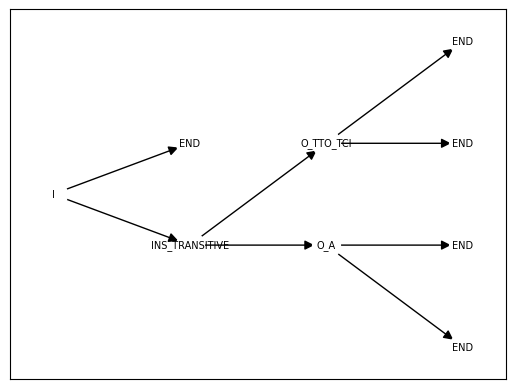

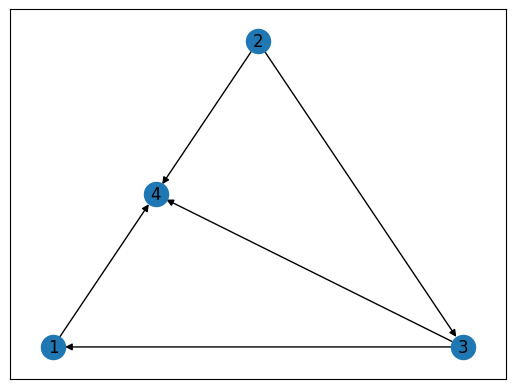

In [930]:
encoded_g = init_grow(3, 0.8, operators_oto)
draw_ce(encoded_g)

g = decode_ce(encoded_g)
draw_graph(g, 'planar')

# Isomorphism

In [931]:
def delete_duplicates(elements, comparator=lambda x1, x2: x1 == x2, key=lambda x: x):
    unique_count = 0
        
    while unique_count < len(elements):
        i = unique_count + 1
        while i < len(elements):
            if comparator(key(elements[unique_count]), key(elements[i])):
                del elements[i]
            else:
                i += 1
        unique_count += 1
        
    return elements

def delete_isomorphic(graphs):
    return delete_duplicates(graphs, comparator=lambda g1, g2: nx.is_isomorphic(g1, g2))

# Completeness

In [932]:
def check_completeness(iteration_limit, nodes_count, encoding_generator, batch_size=1000):
    assert nodes_count <= 8, "It's hard to validate more than 8 node graph"
        
    non_isomorphic_collection = []
    for i in range(iteration_limit):
        iteration_collection = [decode_ce(encoding_generator()) for _ in range(batch_size)]
        iteration_collection = [g for g in iteration_collection if g.number_of_nodes() == nodes_count]
        
        print(i, 'iteration. Decoded', len(iteration_collection),'required graphs')
        
        non_isomorphic_collection.extend(iteration_collection)
        delete_isomorphic(non_isomorphic_collection)
        
        print(i, 'iteration. Non-isomorphic count:', len(non_isomorphic_collection))
    
    return non_isomorphic_collection

## One-to-one

In [933]:
# https://oeis.org/A345258
# one-to-one
validation_oto_seq = [
    1,           # 1
    1,           # 2
    2,           # 3
    10,          # 4
    98,          # 5
    1960,        # 6
    80176,       # 7
    6686760,     # 8
    1129588960,  # 9
    384610774696 # 10
]

In [934]:
graphs = check_completeness(
    iteration_limit=10, 
    nodes_count=4, 
    encoding_generator=lambda : init_grow(4, 0.65, operators_oto + ['WAIT']),
    batch_size=1000,
)

for g in graphs:
    one_to_one_constraint = len([1 for pair in g.in_degree if pair[1] == 0]) == 1 and len([1 for pair in g.out_degree if pair[1] == 0]) == 1
    if not one_to_one_constraint:
        print("one-to-one constraint violated")
    if not nx.is_directed_acyclic_graph(g):
        print("DAG constraint violated")
    if not nx.is_weakly_connected(g):
        print("Connectivity constraint violated")

0 iteration. Decoded 134 required graphs
0 iteration. Non-isomorphic count: 10
1 iteration. Decoded 137 required graphs
1 iteration. Non-isomorphic count: 10
2 iteration. Decoded 144 required graphs
2 iteration. Non-isomorphic count: 10
3 iteration. Decoded 151 required graphs
3 iteration. Non-isomorphic count: 10
4 iteration. Decoded 128 required graphs
4 iteration. Non-isomorphic count: 10
5 iteration. Decoded 121 required graphs
5 iteration. Non-isomorphic count: 10
6 iteration. Decoded 140 required graphs
6 iteration. Non-isomorphic count: 10
7 iteration. Decoded 133 required graphs
7 iteration. Non-isomorphic count: 10
8 iteration. Decoded 113 required graphs
8 iteration. Non-isomorphic count: 10
9 iteration. Decoded 129 required graphs
9 iteration. Non-isomorphic count: 10


## Many-to-one

In [935]:
# https://oeis.org/A350415
# many-to-one 
validation_mto_seq = [
    1,           # 1
    1,           # 2
    3,           # 3
    16,          # 4
    164,         # 5
    3341,        # 6
    138101,      # 7
    11578037,    # 8
    1961162564,  # 9
    668678055847 # 10
]

In [936]:
mto_set = ['SEQ','WAIT', 'CPI', 'CPO', 'CR2', 'AP', 'APO']

_ = check_completeness(
    iteration_limit=10, 
    nodes_count=4, 
    encoding_generator=lambda : init_grow(4, 0.7, mto_set),
    batch_size=10000,
)

KeyError: 'CPI'

## Many-to-many

In [ ]:
# https://oeis.org/A101228
# many-to-many
validation_mtm_seq = [
    1, 
    1,
    4,
    24,
    267,
    5647,
    237317,
    20035307,
    3404385285,
    1162502511721
]





def check_completeness(iteration_limit, nodes_count, encoding_generator, batch_size=1000):
    assert nodes_count <= 8, "It's hard to validate more than 8 node graph"
        
    non_isomorphic_collection = []
    for i in range(iteration_limit):
        iteration_collection = [decode_ce(encoding_generator()) for _ in range(batch_size)]
        iteration_collection = [g for g in iteration_collection if g.number_of_nodes() == nodes_count]
        
        print(i, 'iteration. Decoded', len(iteration_collection),'required graphs')
        
        non_isomorphic_collection.extend(iteration_collection)
        delete_isomorphic(non_isomorphic_collection)
        
        print(i, 'iteration. Non-isomorphic count:', len(non_isomorphic_collection))
    
    return non_isomorphic_collection

In [937]:
graphs = check_completeness(
    iteration_limit=10, 
    nodes_count=5, 
    encoding_generator=lambda : init_grow(5, 0.7, ['SEQ', 'PAR', 'CPI', 'CPO', 'CI', 'CR', 'AP', 'AS']), 
    batch_size=100000,
)

KeyError: 'PAR'

In [81]:
graphs2 = check_completeness(
    iteration_limit=10, 
    nodes_count=5, 
    encoding_generator=lambda : init_grow(5, 0.7, ['WAIT', 'SEQ', 'SEQR', 'PAR', 'FULL', 'CPI', 'CPO', 'CI', 'CO', 'CR', 'CR2', 'AP', 'APO', 'AS', 'ASO', 'ASI', 'ASR']), 
    batch_size=100000,
)

0 iteration. Decoded 2956 5 required graphs
0 iteration. Non-isomorphic count: 222
1 iteration. Decoded 3080 5 required graphs
1 iteration. Non-isomorphic count: 232
2 iteration. Decoded 3077 5 required graphs
2 iteration. Non-isomorphic count: 237
3 iteration. Decoded 3055 5 required graphs
3 iteration. Non-isomorphic count: 240
4 iteration. Decoded 3060 5 required graphs
4 iteration. Non-isomorphic count: 241
5 iteration. Decoded 3080 5 required graphs
5 iteration. Non-isomorphic count: 244
6 iteration. Decoded 2997 5 required graphs
6 iteration. Non-isomorphic count: 247
7 iteration. Decoded 3119 5 required graphs
7 iteration. Non-isomorphic count: 248
8 iteration. Decoded 3057 5 required graphs
8 iteration. Non-isomorphic count: 251
9 iteration. Decoded 3152 5 required graphs
9 iteration. Non-isomorphic count: 252
Expected: 267 , got: 252


In [82]:
graphs3 = check_completeness(
    iteration_limit=10, 
    nodes_count=6, 
    encoding_generator=lambda : init_grow(5, 0.7, ['WAIT', 'SEQ', 'SEQR', 'PAR', 'FULL', 'CPI', 'CPO', 'CI', 'CO', 'CR', 'CR2', 'AP', 'APO', 'AS', 'ASO', 'ASI', 'ASR']), 
    batch_size=100000,
)

0 iteration. Decoded 5407 6 required graphs
0 iteration. Non-isomorphic count: 1495
1 iteration. Decoded 5455 6 required graphs
1 iteration. Non-isomorphic count: 1866
2 iteration. Decoded 5348 6 required graphs
2 iteration. Non-isomorphic count: 2096
3 iteration. Decoded 5380 6 required graphs
3 iteration. Non-isomorphic count: 2232
4 iteration. Decoded 5406 6 required graphs
4 iteration. Non-isomorphic count: 2346
5 iteration. Decoded 5436 6 required graphs
5 iteration. Non-isomorphic count: 2421
6 iteration. Decoded 5342 6 required graphs
6 iteration. Non-isomorphic count: 2484
7 iteration. Decoded 5334 6 required graphs
7 iteration. Non-isomorphic count: 2526
8 iteration. Decoded 5491 6 required graphs
8 iteration. Non-isomorphic count: 2598
9 iteration. Decoded 5378 6 required graphs
9 iteration. Non-isomorphic count: 2646
Expected: 5647 , got: 2646


# Evolutionary operators

In [89]:
import random

def mutate_one_point(encoding, operators):
    n = len([op for op in dict(encoding.nodes(data='operator')).values() if op != 'END']) - 1
    
    if n == 0:
        return encoding
    else:
        for layer in nx.bfs_layers(encoding, 1):
            for node in layer:
                if random.random() < 1 / n:
                    encoding.nodes[node]['operator'] = random.choice(operators)

    return encoding